## 변수별 통계량 확인

In [1]:
import pandas as pd
import numpy as np

# === Load ===
df = pd.read_excel("./data/KDT2025_CRF_output.xlsx")  # 실제 파일 경로로!

# === 필터링 ===
exclude_idx = {17, 23, 36, 43, 51, 62, 115, 158}
df = df[~df['IDX'].isin(exclude_idx)]
df = df[df['ECG'] != 'Borderline'].reset_index(drop=True)

# === Drop MED_DT ===
df = df.drop(columns=['MED_DT'])

In [2]:
# === 연속형/이산형 분리 예시 ===
continuous_cols = ['AGE', 'Ht', 'Wt', 'SBP', 'DBP']
# 나머지 컬럼은 모두 binary/categorical로 처리한다고 가정
# binary_cols = [col for col in df.columns if col not in ['IDX', 'ECG'] + continuous_cols]
binary_cols = ['SMOKE','ALCHOL','PHY_ACT','HX_STROKE','HX_MI','HX_HTN','HX_DM','HX_DYSLI','HX_ATHERO','FHX_STROKE','FHX_MI','FHX_HTN','FHX_DM']

In [3]:
# === 함수 ===
def get_continuous_stats(series):
    mean = series.mean()
    std = series.std()
    return f"{mean:.1f}±{std:.1f}"

def get_binary_stats(series):
    pct = 100 * (series > 0).sum() / len(series)
    return f"{pct:.1f}"

def get_missing_pct(series):
    pct = 100 * series.isnull().sum() / len(series)
    return f"{pct:.1f}"

In [4]:
# === 세 그룹 ===
groups = {
    "All": df,
    "Abnormal": df[df['ECG'] == 'Abnormal'],
    "Normal": df[df['ECG'] == 'Normal']
}

In [6]:
# === 결과 ===
rows = []

for col in continuous_cols + binary_cols:
    row = {"Feature": col}
    for gname, gdf in groups.items():
        if col in continuous_cols:
            val = get_continuous_stats(gdf[col])
        else:
            print(f"{col}")
            val = get_binary_stats(gdf[col])
        miss = get_missing_pct(gdf[col])
        row[f"{gname}_Value"] = val
        row[f"{gname}_Miss"] = miss
    rows.append(row)

result = pd.DataFrame(rows)
# print(result)

# === 저장 ===
# result.to_excel("clinical_stats_table.xlsx", index=False)

SMOKE
SMOKE
SMOKE
ALCHOL
ALCHOL
ALCHOL
PHY_ACT
PHY_ACT
PHY_ACT
HX_STROKE
HX_STROKE
HX_STROKE
HX_MI
HX_MI
HX_MI
HX_HTN
HX_HTN
HX_HTN
HX_DM
HX_DM
HX_DM
HX_DYSLI
HX_DYSLI
HX_DYSLI
HX_ATHERO
HX_ATHERO
HX_ATHERO
FHX_STROKE
FHX_STROKE
FHX_STROKE
FHX_MI
FHX_MI
FHX_MI
FHX_HTN
FHX_HTN
FHX_HTN
FHX_DM
FHX_DM
FHX_DM


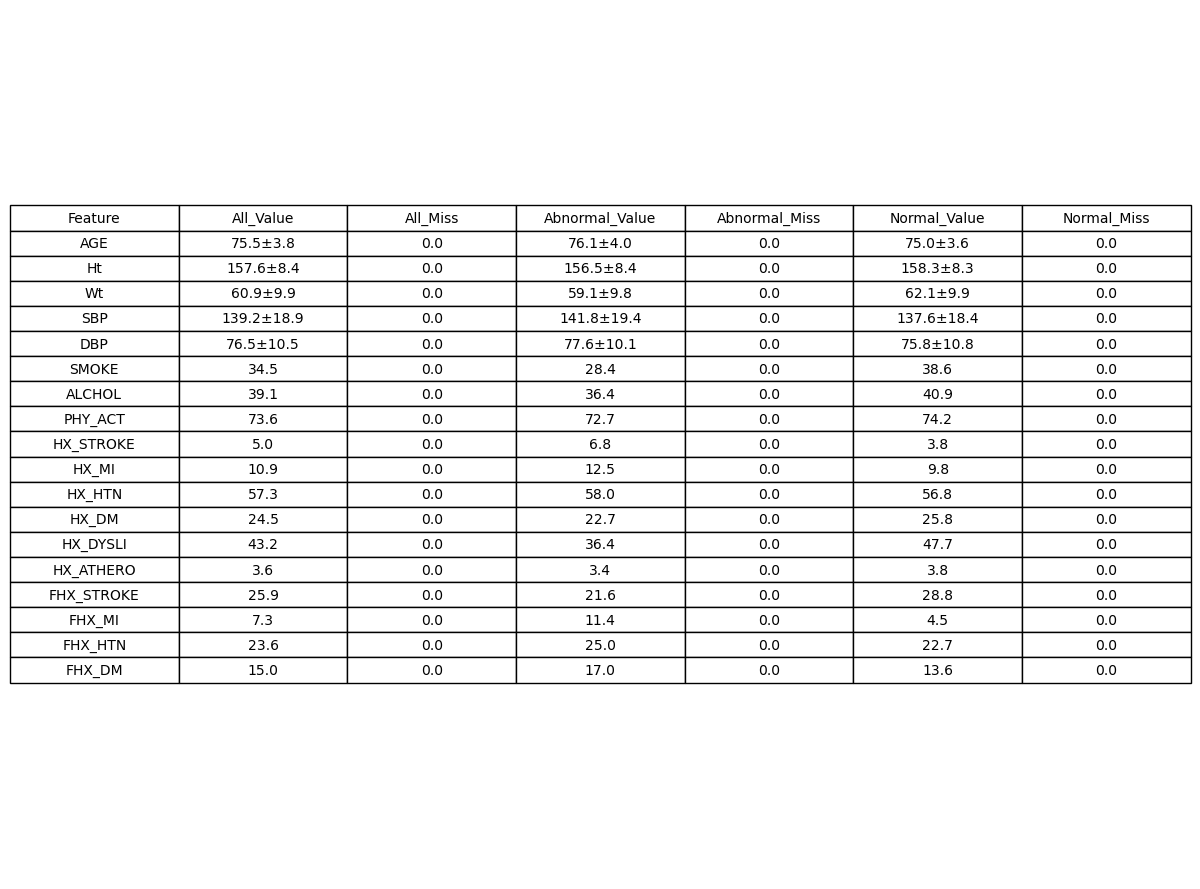

In [7]:
import matplotlib.pyplot as plt

# === result: 위에서 만든 clinical_stats_table DataFrame ===

fig, ax = plt.subplots(figsize=(12, len(result) * 0.5))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Table
table = ax.table(
    cellText=result.values,
    colLabels=result.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # col, row scaling

# Save
plt.tight_layout()
# plt.savefig("clinical_stats_table.png", dpi=300)
plt.show()
# print("✅ Saved table as clinical_stats_table.png")

## 변수 상관성 분석 (인구통계학적 분석)

In [ ]:
# 변수 상관분석
############## 3) 데이터 분석
# 인구통계학적 분석 : 특정 변수가 ECG Normal/Abnormal과 통계적으로 유의한 연관성이 있는지를 평가
import pandas as pd

data = pd.read_csv("./data/final_df.csv")

# data = df[['AGE', 'Ht', 'Wt', 'SBP', 'DBP','SMOKE','ALCHOL','PHY_ACT','HX_STROKE','HX_MI','HX_HTN','HX_DM','HX_DYSLI','HX_ATHERO','FHX_STROKE','FHX_MI','FHX_HTN','FHX_DM', 'ECG']]
print(data.shape)
X = data.drop(['ECG', 'IDX'], axis=1)
y = data['ECG']

print(X.shape)
print(y.shape)
print(X['dfa_alpha'])

(244, 26)
(244, 25)
(244,)
0      0.150640
1      0.995578
2      0.530964
3      1.084926
4     -0.495168
         ...   
239    0.541943
240   -0.488674
241   -0.500000
242    1.707059
243    0.692468
Name: dfa_alpha, Length: 244, dtype: float64


In [61]:
X.columns

Index(['mean_RR_sec', 'SDNN_sec', 'RMSSD_sec', 'IDX', 'AGE', 'SEX', 'Ht', 'Wt',
       'SBP', 'DBP', 'SMOKE', 'ALCHOL', 'PHY_ACT', 'HX_STROKE', 'HX_MI',
       'HX_HTN', 'HX_DM', 'HX_DYSLI', 'HX_ATHERO', 'FHX_STROKE', 'FHX_MI',
       'FHX_HTN', 'FHX_DM', 'dfa_alpha', 'BMI'],
      dtype='object')

In [62]:
abnormal = (y=='Abnormal').sum()
normal = (y=='Normal').sum()
print(f"Abnormal인 경우의 개수: {abnormal}")
print(f"Normal인 경우의 개수: {normal}")

Abnormal인 경우의 개수: 88
Normal인 경우의 개수: 132


In [63]:
from scipy.stats import chi2_contingency, ttest_ind

if abnormal >= 30 and normal >= 30:
    X_features = X
    group_0 = X_features[y=='Abnormal']
    group_1 = X_features[y=='Normal']

    categorical_cols = [
        'SMOKE','ALCHOL','PHY_ACT','HX_STROKE','HX_MI','HX_HTN','HX_DM',
        'HX_DYSLI','HX_ATHERO','FHX_STROKE','FHX_MI','FHX_HTN','FHX_DM'
    ]

    continuous_results = []
    categorical_results = []

    for col in X_features.columns:
        # Null 값 있는지 확인
        if group_0[col].isnull().values.any() or group_1[col].isnull().values.any():
            print(col)
            continue
        
        # 범주형 변수
        if col in categorical_cols:
            count_0_val = group_0[col].value_counts().sort_index()
            count_1_val = group_1[col].value_counts().sort_index()
            total_0 = count_0_val.sum() # group_0 전체 개수
            total_1 = count_1_val.sum()

            percent_0 = count_0_val / total_0 * 100
            percent_1 = count_1_val / total_1 * 100

            # 전체 빈도와 백분율 계산
            total_count = X_features[col].value_counts().sort_index()
            total_total = total_count.sum()
            total_percent = total_count / total_total * 100

            # 카이제곱 검정 : 범주형 변수끼리의 독립성 확인 : X변수와 y간의 독립성 : 연관 있어야 변수 유의미 : 0.005보다 작아야 변수 유의미
            contingency = pd.crosstab(y, X_features[col])
            try:
                chi2, p_value, _, _ = chi2_contingency(contingency)
            except:
                p_value = np.nan
            
            categorical_results.append({
                'Feature': col,
                'Total_Counts': dict(total_count),
                'Total_Percent': dict(total_percent.round(2)),
                'Abnormal_Counts': dict(count_0_val),
                'Abnormal_Percent': dict(percent_0.round(2)),
                'Normal_Counts': dict(count_1_val),
                'Normal_Percent': dict(percent_1.round(2)),
                'p-value': p_value
            })
        # 연속형 변수
        else:
            mean_0 = group_0[col].mean()
            std_0 = group_0[col].std()
            mean_1 = group_1[col].mean()
            std_1 = group_1[col].std()

            overall_mean = X_features[col].mean()
            overall_std = X_features[col].std()

            # 두 집단 분산 비교 - 독립성 검정 : 두 집단의 분산 차이가 있어야 변수 유의미 : 0.05보다 작아야 변수 유의미
            t_stat, p_value = ttest_ind(group_0[col], group_1[col], equal_var=False)
            
            continuous_results.append({
                'Feature': col,
                'Total_Mean': round(overall_mean, 2),
                'Total_STD': round(overall_std, 2),
                'Abnormal_Mean': round(mean_0, 2),
                'Abnormal_STD': round(std_0, 2),
                'Normal_Mean':round(mean_1, 2),
                'Normal_STD': round(std_1, 2),
                'p-value': p_value
            })

In [64]:
# dataframe 변환
df_continuous_stats = pd.DataFrame(continuous_results).sort_values(by="p-value")
df_categorical_stats = pd.DataFrame(categorical_results).sort_values(by="p-value")

In [65]:
df_continuous_stats

,Feature,Total_Mean,Total_STD,Abnormal_Mean,Abnormal_STD,Normal_Mean,Normal_STD,p-value
7,Wt,61.44,12.16,59.13,9.75,62.15,9.87,0.026228
4,AGE,75.33,3.72,76.12,3.97,75.01,3.58,0.034909
3,IDX,128.58,72.68,120.19,67.55,136.45,73.95,0.093810
8,SBP,139.17,18.79,141.77,19.45,137.55,18.37,0.108826
6,Ht,157.87,8.37,156.48,8.44,158.27,8.34,0.122916
11,BMI,24.60,4.17,24.10,3.24,24.79,3.49,0.134491
9,DBP,76.59,10.27,77.62,10.05,75.80,10.77,0.200179
2,RMSSD_sec,0.07,0.21,0.08,0.16,0.06,0.23,0.379902
1,SDNN_sec,0.05,0.15,0.06,0.11,0.05,0.16,0.411412
10,dfa_alpha,0.73,1.39,0.80,1.41,0.65,1.27,0.420213


In [46]:
df_categorical_stats

,Feature,Total_Counts,Total_Percent,Abnormal_Counts,Abnormal_Percent,Normal_Counts,Normal_Percent,p-value
10,FHX_MI,"{0: 204, 1: 16}","{0: 92.73, 1: 7.27}","{0: 78, 1: 10}","{0: 88.64, 1: 11.36}","{0: 126, 1: 6}","{0: 95.45, 1: 4.55}",0.100418
7,HX_DYSLI,"{0: 125, 1: 95}","{0: 56.82, 1: 43.18}","{0: 56, 1: 32}","{0: 63.64, 1: 36.36}","{0: 69, 1: 63}","{0: 52.27, 1: 47.73}",0.126488
0,SMOKE,"{0: 144, 1: 68, 2: 8}","{0: 65.45, 1: 30.91, 2: 3.64}","{0: 63, 1: 24, 2: 1}","{0: 71.59, 1: 27.27, 2: 1.14}","{0: 81, 1: 44, 2: 7}","{0: 61.36, 1: 33.33, 2: 5.3}",0.135875
9,FHX_STROKE,"{0: 163, 1: 57}","{0: 74.09, 1: 25.91}","{0: 69, 1: 19}","{0: 78.41, 1: 21.59}","{0: 94, 1: 38}","{0: 71.21, 1: 28.79}",0.299948
3,HX_STROKE,"{0: 209, 1: 11}","{0: 95.0, 1: 5.0}","{0: 82, 1: 6}","{0: 93.18, 1: 6.82}","{0: 127, 1: 5}","{0: 96.21, 1: 3.79}",0.487312
1,ALCHOL,"{0: 134, 1: 86}","{0: 60.91, 1: 39.09}","{0: 56, 1: 32}","{0: 63.64, 1: 36.36}","{0: 78, 1: 54}","{0: 59.09, 1: 40.91}",0.592050
12,FHX_DM,"{0: 187, 1: 33}","{0: 85.0, 1: 15.0}","{0: 73, 1: 15}","{0: 82.95, 1: 17.05}","{0: 114, 1: 18}","{0: 86.36, 1: 13.64}",0.616344
4,HX_MI,"{0: 196, 1: 24}","{0: 89.09, 1: 10.91}","{0: 77, 1: 11}","{0: 87.5, 1: 12.5}","{0: 119, 1: 13}","{0: 90.15, 1: 9.85}",0.691149
6,HX_DM,"{0: 166, 1: 54}","{0: 75.45, 1: 24.55}","{0: 68, 1: 20}","{0: 77.27, 1: 22.73}","{0: 98, 1: 34}","{0: 74.24, 1: 25.76}",0.725018
11,FHX_HTN,"{0: 168, 1: 52}","{0: 76.36, 1: 23.64}","{0: 66, 1: 22}","{0: 75.0, 1: 25.0}","{0: 102, 1: 30}","{0: 77.27, 1: 22.73}",0.820618
